# Worksheet 02

Name:  Duarte Albuquerque

UID:   U33660660

### Topics

- Effective Programming

### Effective Programming

a) What is a drawback of the top down approach?

A disadvantage to the top down approach is that it is inflexible to change, and is limited to pre-determined solutions (lacks creativity).

b) What is a drawback of the bottom up approach?

This approach can be bad as having to complete individual parts before moving on can hinder the effeciency of the project.

c) What are 3 things you can do to have a better debugging experience?

1. Use logging and have a plan going into debugging. This will allow you to keep track of important information at different stages of your code, and not get lost when debugging.

2. Write tests. Tests will allow you to more easily find the source of the problem.

3. Look online for help. There are plenty of tools online that can help fix code. People have certainly found the same errors you're currently finding.

d) (Optional) Follow along with the live coding. You can write your code here:

## Exercise

This exercise will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data). Download the file named `train.csv` and place it in the same folder as this notebook.

The goal of this exercise is to practice using [pandas](https://pypi.org/project/pandas/) methods. If your:

1. code is taking a long time to run
2. code involves for loops or while loops
3. code spans multiple lines

look through the pandas documentation for alternatives. This [cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) may come in handy.

a) Complete the code below to read in a filepath to the `train.csv` and returns the DataFrame.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("train.csv")
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


b) Complete the code so it returns the number of rows that have at least one empty column value

In [2]:
null_col = df.loc[df.Survived.isnull() | 
                  df.Pclass.isnull() | df.Name.isnull() | 
       df.Sex.isnull() | df.Age.isnull() | 
       df.SibSp.isnull() | df.Parch.isnull() |
       df.Ticket.isnull() | df.Fare.isnull() | 
       df.Cabin.isnull() | df.Embarked.isnull()].shape[0]

print("there are " +  str(null_col) + " rows with at least one empty value")

there are 708 rows with at least one empty value


c) Complete the code below to remove all columns with more than 200 NaN values

In [3]:
df = df.dropna(axis=1, thresh=df.shape[0] - 200)

df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

d) Complete the code below to replaces `male` with 0 and `female` with 1

In [4]:
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


e) Complete the code below to add four columns `First Name`, `Middle Name`, `Last Name`, and `Title` corresponding to the value in the `name` column.

For example: `Braund, Mr. Owen Harris` would be: 

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

Anything not clearly one of the above 4 categories can be ignored.

In [5]:
def process_name(x):
    try:
        first_name = x.split(".")[1].split(" ")[1] if len(x.split(".")[1].split(" ")) > 1 else ""
        middle_name = x.split(".")[1].split(" ")[2] if len(x.split(".")[1].split(" ")) > 2 else ""
        last_name = x.split(",")[0]
        title = x.split(",")[1].split(".")[0] if len(x.split(",")[1].split(".")) > 0 else ""

        return pd.Series([first_name, middle_name, last_name, title])
    except IndexError:
        return pd.Series([np.nan, np.nan, np.nan, np.nan])

df[['First Name', 'Middle Name', 'Last Name', 'Title']] = df['Name'].apply(process_name)
df.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",0,NaN,0,0,374910,8.0500,S,Charles,Joseph,Shorney,Mr
96,97,0,1,"Goldschmidt, Mr. George B",0,71.0,0,0,PC 17754,34.6542,C,George,B,Goldschmidt,Mr
97,98,1,1,"Greenfield, Mr. William Bertram",0,23.0,0,1,PC 17759,63.3583,C,William,Bertram,Greenfield,Mr
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",1,34.0,0,1,231919,23.0000,S,John,T,Doling,Mrs


f) Complete the code below to replace all missing ages with the average age

In [6]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,S,Laina,,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,S,William,Henry,Allen,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",0,29.699118,0,0,374910,8.0500,S,Charles,Joseph,Shorney,Mr
96,97,0,1,"Goldschmidt, Mr. George B",0,71.000000,0,0,PC 17754,34.6542,C,George,B,Goldschmidt,Mr
97,98,1,1,"Greenfield, Mr. William Bertram",0,23.000000,0,1,PC 17759,63.3583,C,William,Bertram,Greenfield,Mr
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",1,34.000000,0,1,231919,23.0000,S,John,T,Doling,Mrs


g) Plot a bar chart of the average age of those that survived and did not survive. Briefly comment on what you observe.

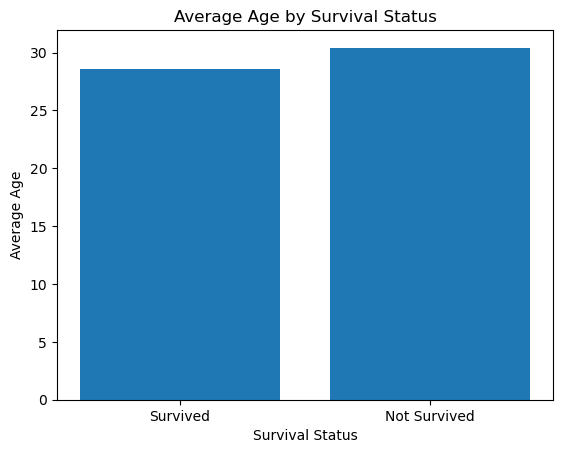

In [7]:
import matplotlib.pyplot as plt

def average_age(df):
    not_s = 0
    age_not = 0
    did_s = 0
    age_s = 0
    for i in range(df.shape[0]):
        if df['Survived'][i] == 0:
            not_s += 1
            age_not += df['Age'][i]
        else:
            did_s += 1
            age_s += df['Age'][i]
    average_age_survive = age_s/did_s
    average_age_not_survive = age_not/not_s
    return([average_age_survive, average_age_not_survive])

result = average_age(df)

plt.bar(['Survived', 'Not Survived'], result)

plt.xlabel('Survival Status')
plt.ylabel('Average Age')
plt.title('Average Age by Survival Status')

plt.show()